# Import the necessary libraries

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Reading the Employee Attrition Dataset

In [2]:
df = pd.read_csv('employee_attrition.csv')

# Perform Data Preprocessing
# Drop unnecessary columns

In [3]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Encode categorical variables

In [4]:
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['OverTime'] = le.fit_transform(df['OverTime'])

# Visualize Data

In [5]:
# sns.pairplot(df, hue='Attrition')
# plt.show()

# Split data into training and testing sets

In [6]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building using Logistic Regression and Decision Tree
# Logistic Regression

In [7]:
lr = LogisticRegression(random_state=42, solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

# Decision Tree

In [8]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Calculate Performance metrics
# 1. Logistic Regression

In [10]:
lr_pred = lr.predict(X_test)
print("Logistic Regression Performance Metrics:")
print("Accuracy Score:", accuracy_score(y_test, lr_pred))
print("Precision Score:", precision_score(y_test, lr_pred))
print("Recall Score:", recall_score(y_test, lr_pred))
print("F1 Score:", f1_score(y_test, lr_pred))

Logistic Regression Performance Metrics:
Accuracy Score: 0.8775510204081632
Precision Score: 0.6363636363636364
Recall Score: 0.1794871794871795
F1 Score: 0.28


# 2. Decision Tree

In [11]:
dt_pred = dt.predict(X_test)
print("\nDecision Tree Performance Metrics:")
print("Accuracy Score:", accuracy_score(y_test, dt_pred))
print("Precision Score:", precision_score(y_test, dt_pred))
print("Recall Score:", recall_score(y_test, dt_pred))
print("F1 Score:", f1_score(y_test, dt_pred))


Decision Tree Performance Metrics:
Accuracy Score: 0.7993197278911565
Precision Score: 0.23684210526315788
Recall Score: 0.23076923076923078
F1 Score: 0.23376623376623376


# Visualize model performance

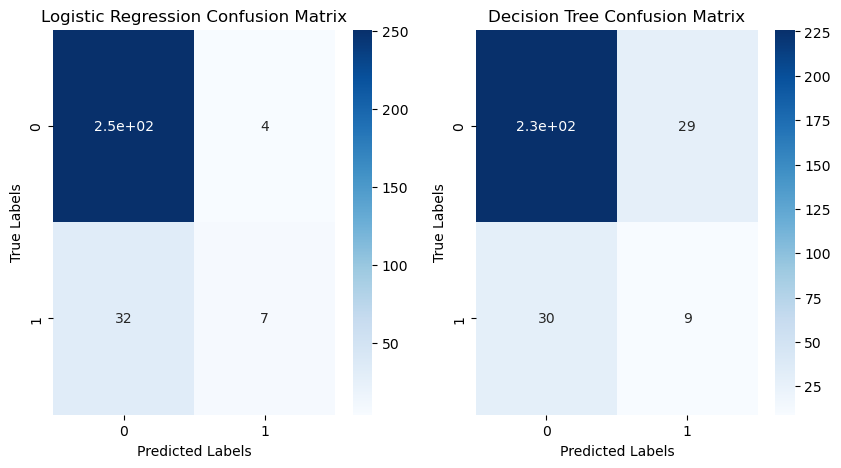

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='Blues', ax=ax[0])
ax[0].set_title('Logistic Regression Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, cmap='Blues', ax=ax[1])
ax[1].set_title('Decision Tree Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')
plt.show()